## import libraries

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Explore the dataset

In [19]:
file_path = "Obesity Classification.csv"
df = pd.read_csv(file_path)


In [20]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


## checkout for null_values/duplicates

In [22]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [23]:
df.duplicated().sum()

0

## Drop Column

In [24]:
df.drop('ID', axis=1, inplace=True)

## Data Visualization

In [25]:
df1 = df.copy()
df1.head(3)


,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight


In [26]:
df2 = df.groupby(['Label', 'Age'])['Weight'].mean().reset_index()
df2.tail()

,Label,Age,Weight
96,Underweight,70,20.0
97,Underweight,72,45.0
98,Underweight,83,50.0
99,Underweight,93,40.0
100,Underweight,103,30.0


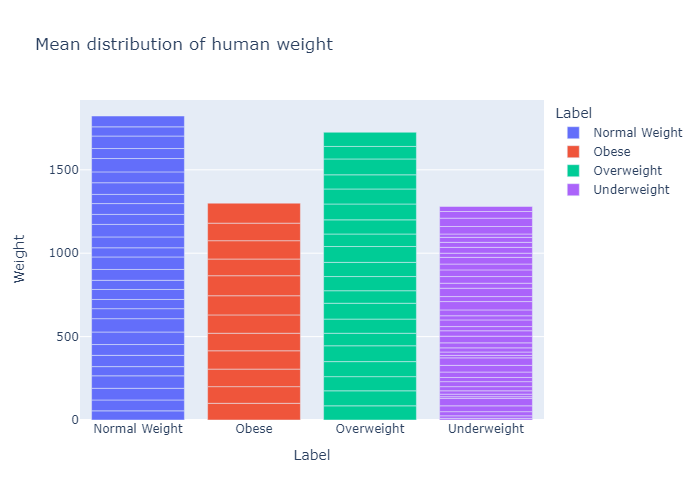

In [27]:
fig = px.bar(df2, x='Label', y='Weight', color='Label', hover_data='Age', title='Mean distribution of human weight')
fig.show(renderer='png')

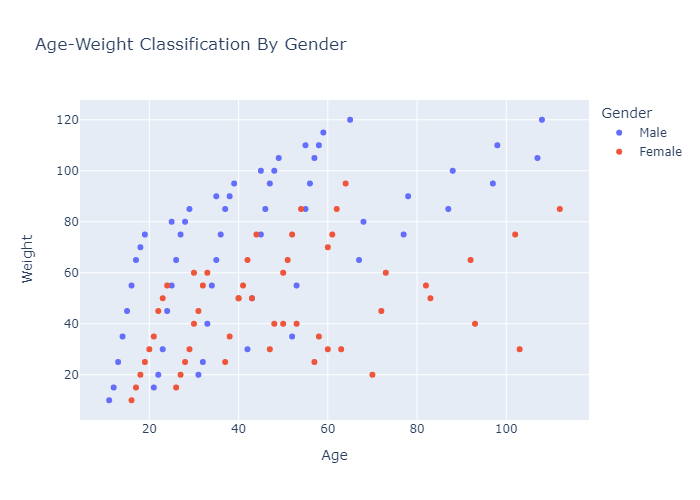

In [28]:
fig = px.scatter(df, x='Age', y='Weight', color='Gender', title='Age-Weight Classification By Gender')
fig.show(renderer='png')

In [29]:
df2 = df['Gender'].value_counts().reset_index()
df2

,Gender,count
0,Male,56
1,Female,52


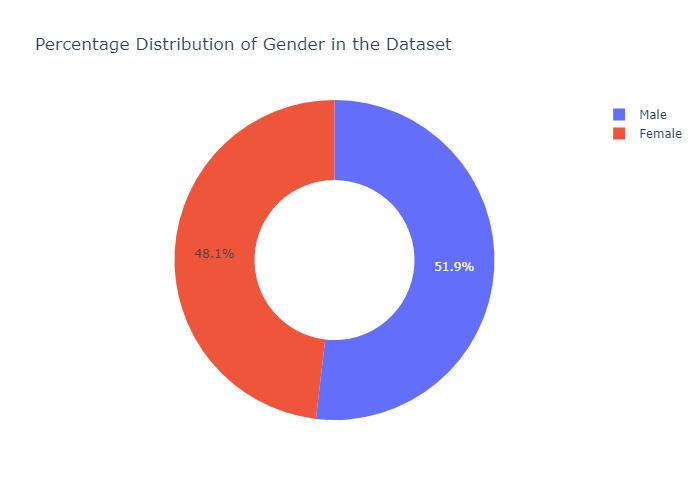

In [30]:
fig = px.pie(df2, names='Gender', values='count', hole=0.5, title='Percentage Distribution of Gender in the Dataset')
fig.show(renderer='png')

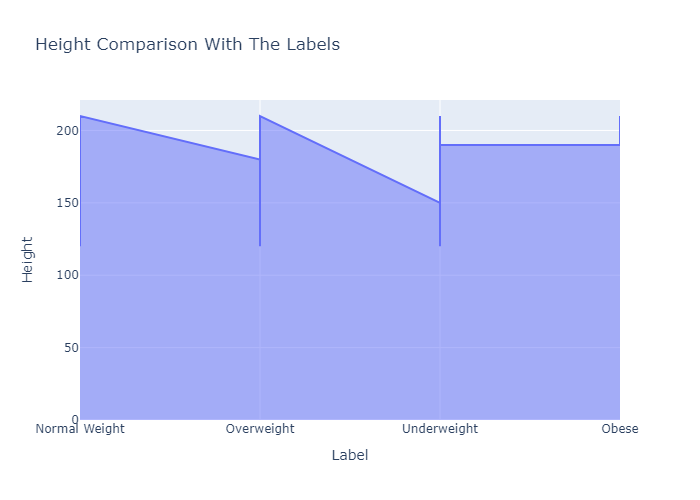

In [31]:
fig = px.area(df, x='Label', y='Height', hover_data='BMI', title='Height Comparison With The Labels')
fig.show(renderer='png')

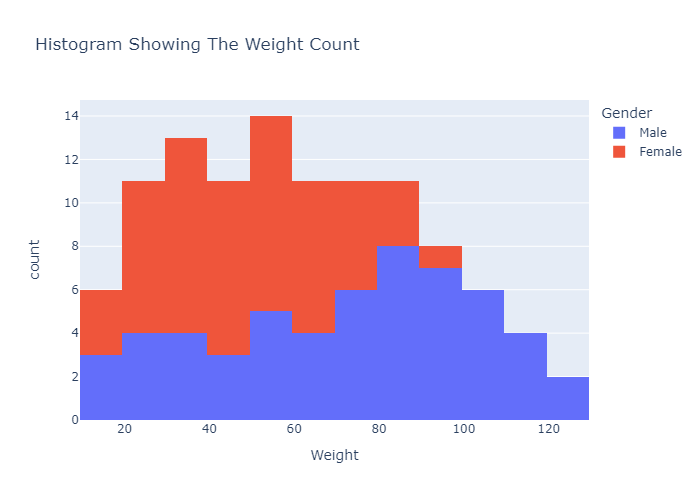

In [32]:
fig = px.histogram(df, x='Weight', color='Gender', nbins=15, title='Histogram Showing The Weight Count')
fig.show(renderer='png')

In [33]:
df2 = df.groupby('Label')['Age'].max().reset_index()
df2

,Label,Age
0,Normal Weight,92
1,Obese,108
2,Overweight,112
3,Underweight,103


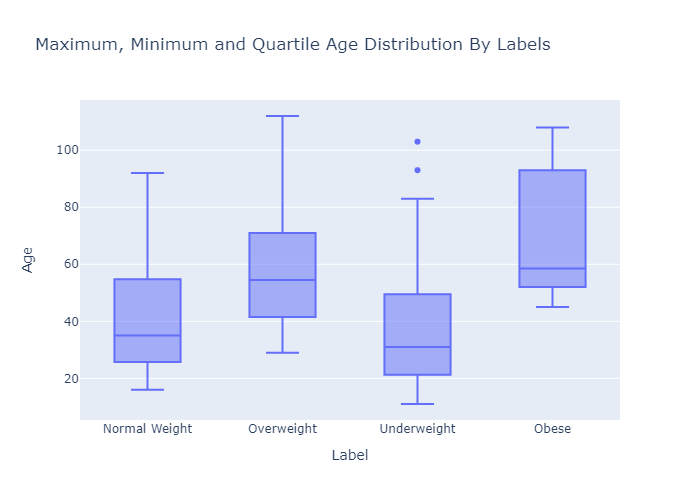

In [34]:
fig = px.box(df, x='Label', y='Age', title='Maximum, Minimum and Quartile Age Distribution By Labels ')
fig.show(renderer='png')

In [35]:
numeric_df = df.select_dtypes('number')
corr_df = numeric_df.corr()

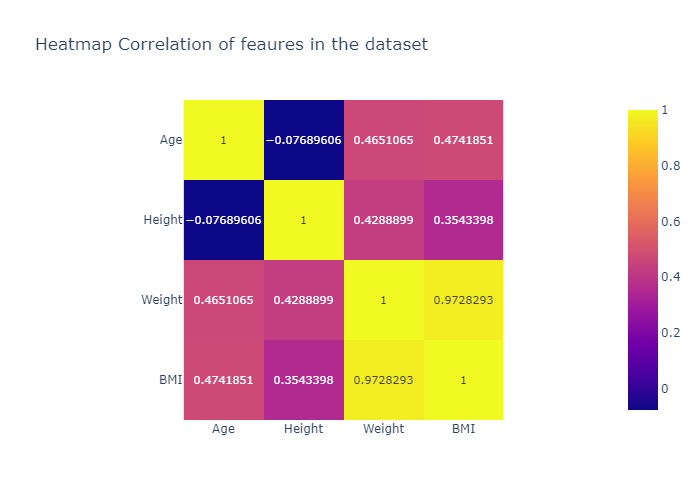

In [36]:
fig = px.imshow(corr_df, text_auto=True, title='Heatmap Correlation of feaures in the dataset')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

In [25]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

## Convert Categorical features to numeric

In [26]:
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [27]:
# Python Map Method
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['Label'] = df['Label'].map({'Normal Weight':0, 'Underweight':1, 'Overweight':2, 'Obese':3})
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,1
4,45,1,190,100,31.2,3


## convert floats to integer

In [28]:
df['BMI'] = df['BMI'].astype('int')
df.tail(3)


,Age,Gender,Height,Weight,BMI,Label
105,21,1,180,15,5,1
106,26,0,150,15,5,1
107,31,1,190,20,8,1


## Checkout for outliers

In [4]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


## Split the dataset into training/testing set and Labels

In [29]:
train_set = df.sample(frac=0.8, random_state=0)
test_set = df.drop(train_set.index)

In [30]:
train_features = train_set.copy()
test_features =test_set.copy()

In [31]:
train_labels = train_features.pop('Label')
test_label = test_features.pop('Label')

## Apply Normalization

In [32]:
feature_normalized = preprocessing.Normalization()
feature_normalized.adapt(np.array(train_features))

## Model using sequential model

In [33]:
model = keras.models.Sequential([
    feature_normalized,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

## Print the model summary

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 9,295
Trainable params: 9,284
Non-trainable params: 11
_________________________________________________________________


## Compile the model

In [35]:
loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.01)
metric = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metric)

## Fit in the model for training

In [36]:
# history = model.fit(train_features, train_labels, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 1s 320ms/step - loss: 1.2529 - accuracy: 0.4559 - val_loss: 0.8624 - val_accuracy: 0.5556
Epoch 2/200
3/3 [==============================] - 0s 31ms/step - loss: 0.8057 - accuracy: 0.6912 - val_loss: 0.6680 - val_accuracy: 0.6111
Epoch 3/200
3/3 [==============================] - 0s 29ms/step - loss: 0.5767 - accuracy: 0.7206 - val_loss: 0.5357 - val_accuracy: 0.7222
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 0.4833 - accuracy: 0.7353 - val_loss: 0.4879 - val_accuracy: 0.7778
Epoch 5/200
3/3 [==============================] - 0s 28ms/step - loss: 0.4108 - accuracy: 0.7794 - val_loss: 0.5769 - val_accuracy: 0.6111
Epoch 6/200
3/3 [==============================] - 0s 29ms/step - loss: 0.3849 - accuracy: 0.8382 - val_loss: 0.5997 - val_accuracy: 0.7778
Epoch 7/200
3/3 [==============================] - 0s 30ms/step - loss: 0.4468 - accuracy: 0.7794 - val_loss: 0.4380 - val_accuracy: 0.7778
Epoch 8/200
3/3 [==

## Evaluate the model

In [37]:
model.evaluate(test_features, test_label, verbose=1)

1/1 [==============================] - 0s 72ms/step - loss: 0.0062 - accuracy: 1.0000


[0.006201563868671656, 1.0]

In [38]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25,0
1,30,0,160,60,22,0
2,35,1,180,90,27,2
3,40,0,150,50,20,1
4,45,1,190,100,31,3


## Save/load the model

In [41]:
model.save('tf_model')

INFO:tensorflow:Assets written to: tf_model\assets


In [42]:
model = keras.models.load_model('tf_model')

### NB: np.argmax is used to find the index of the highest probability for each input, which corresponds to the predicted class.

In [48]:
predictions = model.predict([[35, 1, 180, 90, 27]])
predicted_index = np.argmax(predictions, axis=1)[0]
class_labels = ['Normal Weight', 'Underweight', 'Overweight', 'Obese']
predicted_class_label = class_labels[predicted_index]
predicted_class_label

1/1 [==============================] - 0s 71ms/step


'Overweight'